# PCA & CLUSTERING ASSIGNMENT (Using Wine Dataset)

## Task 1: Exploratory Data Analysis (EDA)
### 1.Load dataset & basic exploration

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("wine.csv")

# Basic info
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 2. Check missing values

In [9]:
df.isnull().sum()


Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

### 3. Feature distributions (histograms & box plots)

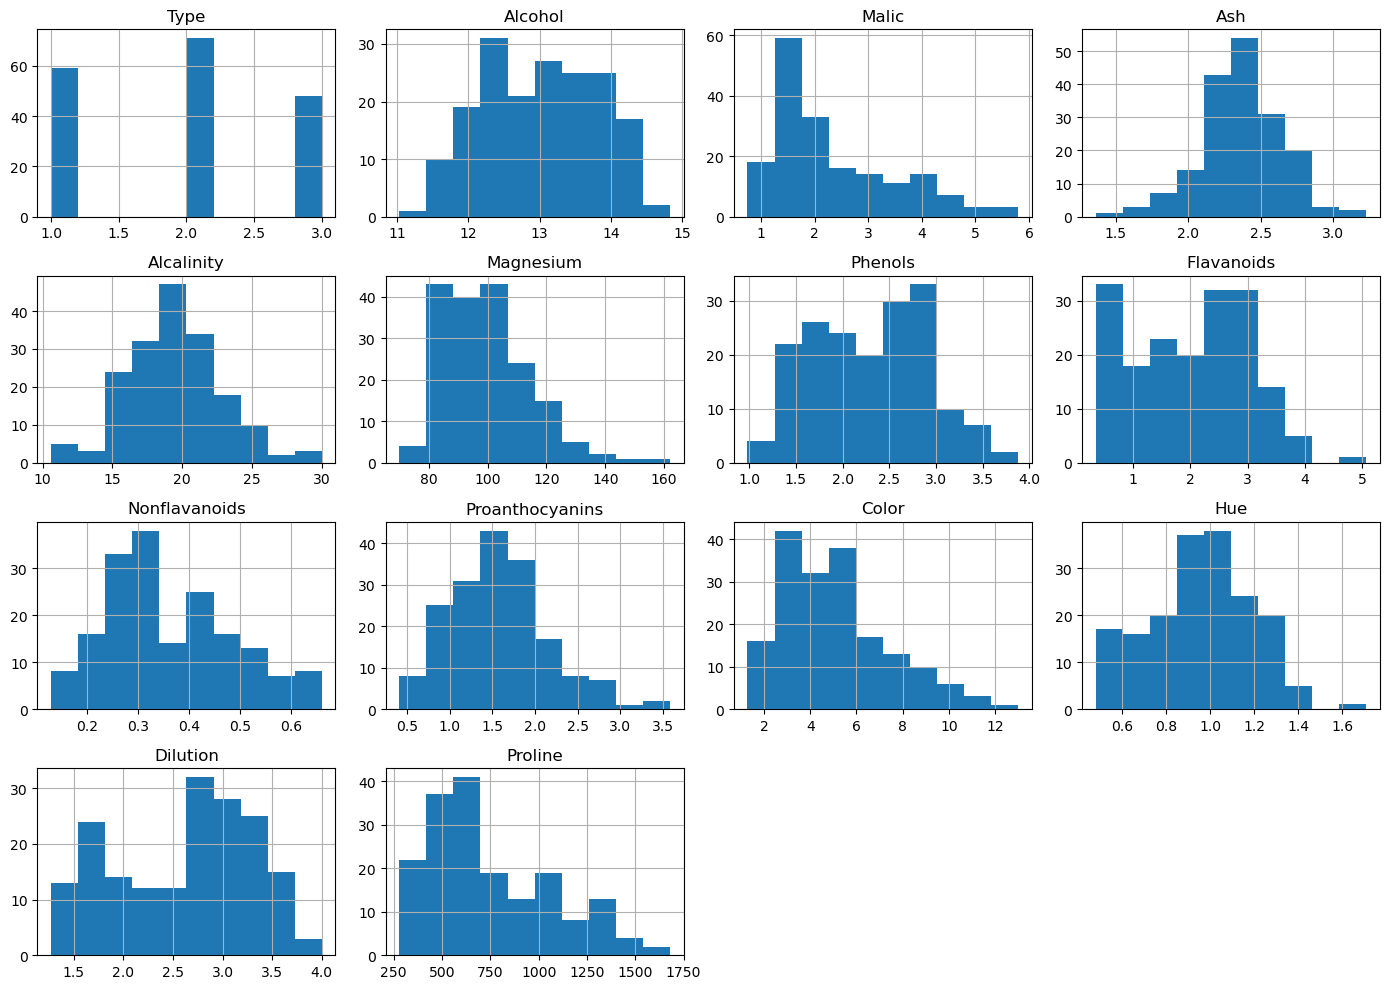

In [14]:
df.hist(figsize=(14,10))
plt.tight_layout()
plt.show()


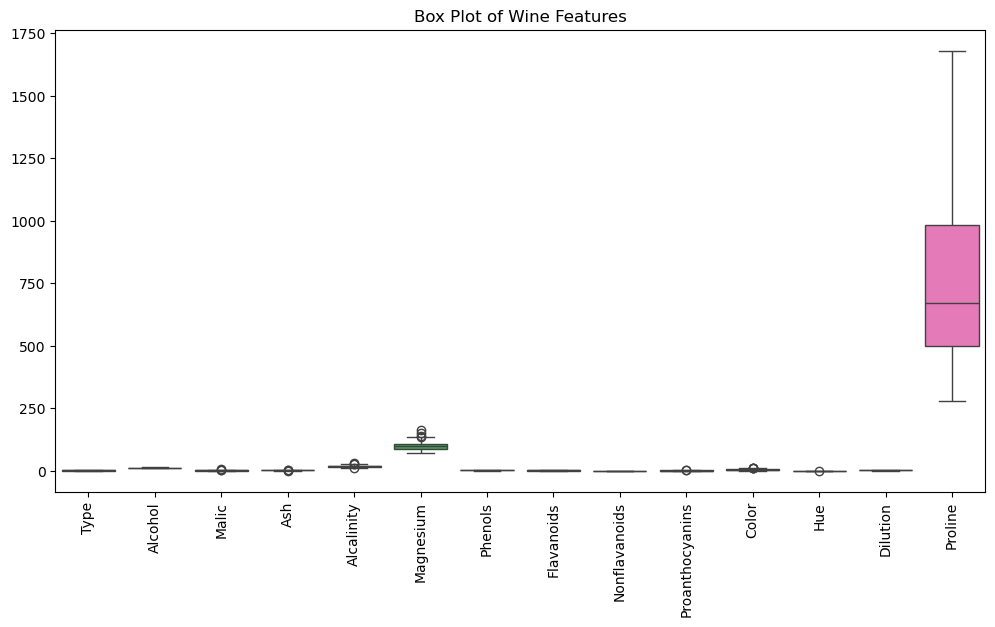

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot of Wine Features")
plt.show()


### 4. Correlation analysis

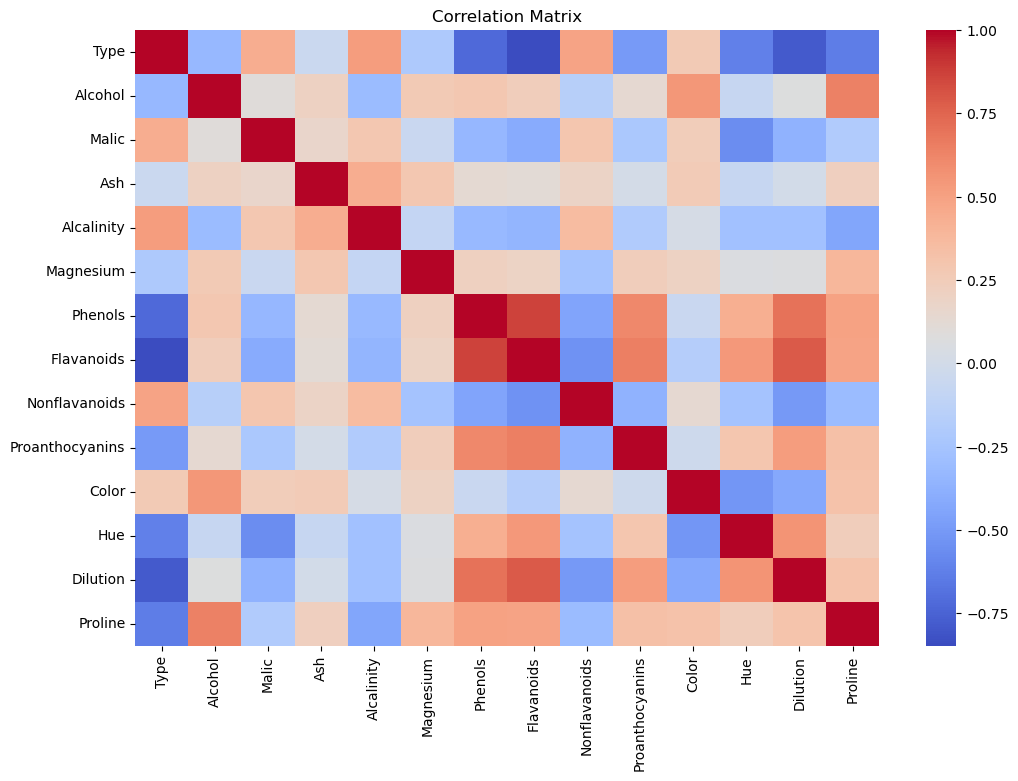

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()


## Task 2: Dimensionality Reduction with PCA
### 1. Standardize features

In [25]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Alcohol', axis=1)  # assuming 'class' is the label
y = df['Alcohol']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 2.Apply PCA & find optimal components

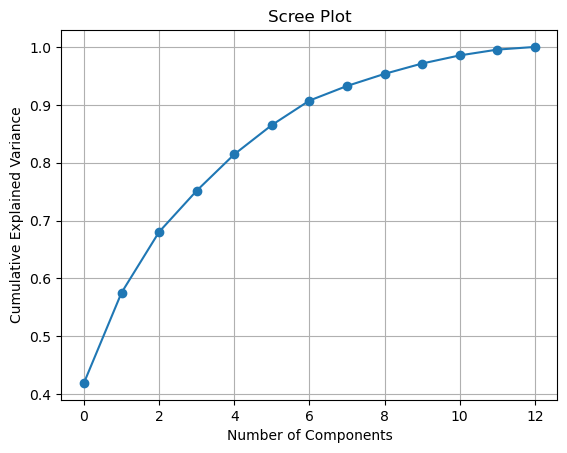

In [28]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(explained_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.show()


### 3.Transform using optimal components

In [31]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_scaled)


## Task 3: Clustering on Original Data
### 1. Apply K-Means

In [34]:
from sklearn.cluster import KMeans

kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(X_scaled)


C:\Users\shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 2. isualize clusters (using first two features)

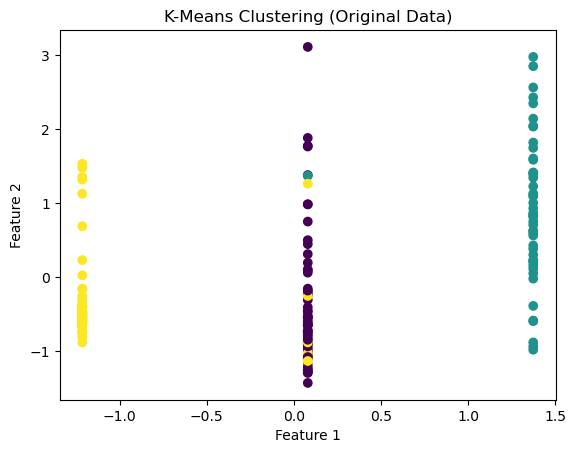

In [38]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_original, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering (Original Data)")
plt.show()


### 3. Evaluate clustering

In [41]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("Silhouette Score (Original):", silhouette_score(X_scaled, labels_original))
print("Davies-Bouldin Index (Original):", davies_bouldin_score(X_scaled, labels_original))


Silhouette Score (Original): 0.28628258889905817
Davies-Bouldin Index (Original): 1.3887535221193363


## Task 4: Clustering on PCA-Transformed Data
### 1. Apply K-Means on PCA data

In [44]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_2)


C:\Users\shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 2. Visualize PCA clusters

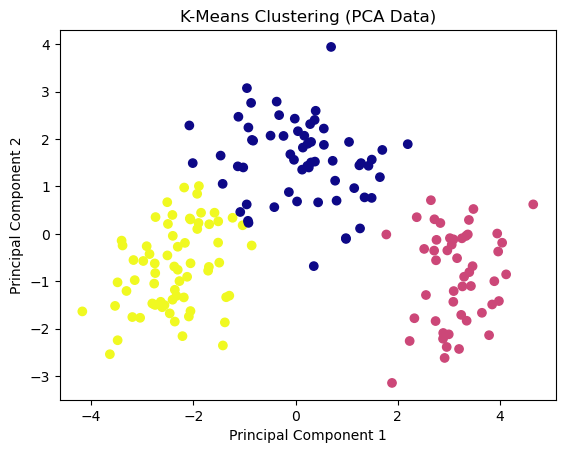

In [47]:
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=labels_pca, cmap='plasma')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (PCA Data)")
plt.show()


### 3. Evaluate PCA clustering

In [52]:
print("Silhouette Score (PCA):", silhouette_score(X_pca_2, labels_pca))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(X_pca_2, labels_pca))


Silhouette Score (PCA): 0.5551828206132293
Davies-Bouldin Index (PCA): 0.6089554873408378


## Task 5: Comparison and Analysis
🔍 Comparison Table

In [55]:
comparison = pd.DataFrame({
    "Method": ["Original Data", "PCA Data"],
    "Silhouette Score": [
        silhouette_score(X_scaled, labels_original),
        silhouette_score(X_pca_2, labels_pca)
    ],
    "Davies-Bouldin Index": [
        davies_bouldin_score(X_scaled, labels_original),
        davies_bouldin_score(X_pca_2, labels_pca)
    ]
})

comparison


,Method,Silhouette Score,Davies-Bouldin Index
0,Original Data,0.286283,1.388754
1,PCA Data,0.555183,0.608955


### Analysis 

PCA improves visual separability of clusters

PCA reduces noise and redundancy

Clustering on PCA data is faster and more interpretable

Original data may capture fine-grained patterns, but is harder to visualize

## Task 6: Conclusion and Insights
Final Conclusion:

In this assignment, PCA was applied to reduce the dimensionality of the Wine dataset while preserving most of the variance. Clustering on PCA-transformed data resulted in clearer cluster separation and improved interpretability compared to clustering on the original high-dimensional data. PCA helps reduce noise and computational complexity, making clustering more effective. However, clustering on original data may retain more detailed information. PCA is recommended when visualization, speed, and noise reduction are priorities.